In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

health = pd.read_csv('Mental health Depression disorder Data.csv')

/var/folders/qs/k20tf5tx1g95_rd5zfrm_4nw0000gn/T/ipykernel_21963/300513165.py:8: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('Mental health Depression disorder Data.csv')


In [2]:
health.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [3]:
#print(health['Entity'].unique()) # choose 10 countries to analyze + US 

In [89]:
# builting the dataframe
    # create new df with countries we're interested in studying
    # fix the index 
    # added variable for whether it has universal healthcare or not
    
developed = health.loc[health['Entity'].isin(['United States','Japan','Argentina','Australia','United Kingdom', 'South Korea','Denmark','Canada','France','Taiwan','Uruguay','Germany'])]
developed.head()
developed = developed.reset_index(drop=True)

developed = developed.drop('index', axis=1)

# have universal care or practically universal care (for example may be small co-pays)
developed["Universal_Care"] = np.nan

developed["Universal_Care"] = np.where(developed['Entity'] == 'United States', 0,1) 



In [101]:
map_names = {'Entity': 'country',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo', 
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating_dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

developed.rename(columns=map_names,inplace=True)


In [100]:
# simiplify dataframe to just look at eating disorders

developed.drop(['Code',"schizo","bipolar",'alcohol','anxiety','drug','depres'], axis=1)


,country,year,eating_dis,Universal_Care
0,Argentina,1990,0.323686,1
1,Argentina,1991,0.326904,1
2,Argentina,1992,0.330504,1
3,Argentina,1993,0.334286,1
4,Argentina,1994,0.338418,1
...,...,...,...,...
331,Uruguay,2013,0.379651,1
332,Uruguay,2014,0.385984,1
333,Uruguay,2015,0.392488,1
334,Uruguay,2016,0.398546,1


In [102]:

# finish cleaning dataset bu dropping nan
developed=developed.dropna()


In [103]:
# checking that all countries have data from 1990 to 2017

#countries = developed['Entity'].unique()

#for country in countries:
    #print(country, len(developed['Year'].unique()), developed['Year'].unique())

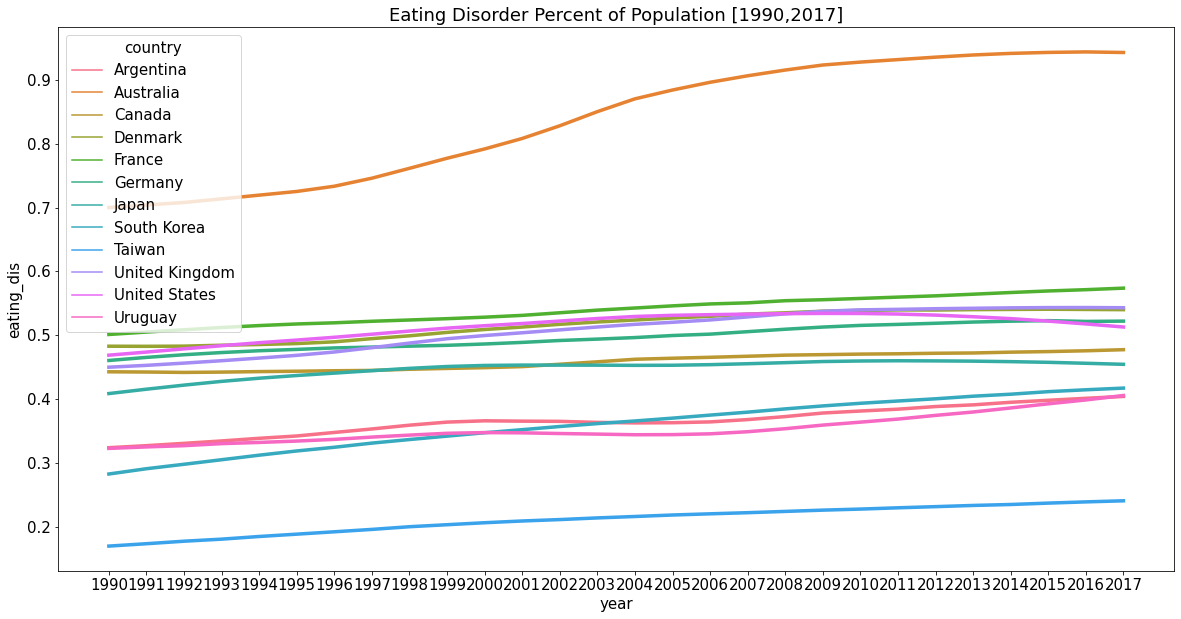

In [105]:
developed['eating_dis'] = pd.to_numeric(developed['eating_dis'])

plt.figure(figsize=(20,10))

plt.rcParams['font.size'] = 15
figure= sns.lineplot(data=developed, x='year', y='eating_dis', hue='country', linewidth=3.5)
plt.fontsize=10
plt.title('Eating Disorder Percent of Population [1990,2017]')
plt.show()

In [111]:
ed_obj = smf.ols(formula = 'eating_dis~alcohol+drug+drug*alcohol', data = developed).fit()
ed_obj.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             eating_dis   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     82.61
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           6.06e-40
Time:                        19:37:40   Log-Likelihood:                 257.05
No. Observations:                 336   AIC:                            -506.1
Df Residuals:                     332   BIC:                            -490.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0807      0.062     -1.294      0.197      -0.203       0.042
alcohol          0.2053      0.034      6.013      0.000       0.138       0.272
drug             0.6033      0.057     10.514      0.000       0.490       0.716
drug:alcohol    -0.2668      0.031     -8.545      0.000      -0.328      -0.205
==============================================================================
Omnibus:                        0.269   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.353
Skew:                           0.062   Prob(JB):                        0.838
Kurtosis:                       2.901   Cond. No.                         53.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""